In [91]:
from cil.framework import AcquisitionGeometry, ImageGeometry
from cil.utilities.display import show_geometry

# A detailed look at CIL geometry
CIL holds your CT data in specilised data-containers, `AcquisitionData` and `ImageData`.

Each of these has an associated `geometry` whoch contains the meta-data describing your set-up.

 - `AcquisitionGeometry` describes the acquisition data and parameters

 - `ImageGeometry` describes the image data (i.e. the reconstruction volume)

The data-readers provided by CIL (Nikon, Zeiss and diamond nexus readers) will read in your data and return you a fully configured acquisition data with the acquisition geometry already configured, however if you read in a stack of Tifs or want to tweak the parameters this is simple to create youself.


## Create a simple Acquisition Geometry

You can use the `AcquisitionGeometry` methods to describe circular trajectory parallel-beam or cone-beam 2D or 3D data.

 - `ag = AcquisitionGeometry.create_Parallel2D()`
 - `ag = AcquisitionGeometry.create_Parallel3D()`
 - `ag = AcquisitionGeometry.create_Cone2D(source_position, detector_position)`
 - `ag = AcquisitionGeometry.create_Cone3D(source_position, detector_position)`

This notebook will step though each in turn and show you how to describe both simple and complex geometries with offsets and rotations.

No matter which type of geometry you create you will also need to describe the panel and projection angles.
 - `ag.set_panel(num_pixels, pixel_size)`
 - `ag.set_angles(angles, angle_unit)`

For multi-channel data you need to add the number of channels.
 - `ag.set_channels(num_channels)`

And you will also need to describe the order your data is stored in using the relavent labels from the CIL default labels: `Channel, Angle, Vertical and Horizontal`
 - `ag.set_labels(['Angle','Vertical','Horizontal'])`


### A Note on CIL acquisition geometry:
 - The geometry is described by a right-handed cooridinate system
 - Positive angles describe the object rotating anti-clockwise when viewed from above

## Create a simple Image Geometry

To create a default ImageGeometry you can use:
 `ig = ag.get_ImageGeometry()`

This creates an image geometry based on you panel size and magnification.

All the examples below show the AcquisitionGeometry set-up and the coresponding default `ImageGeometry`.

`show_geometry()` can be used to display the configured geometry and will be used here extensively. You can also print the geometry to obtain a detailed description.




### Parallel geometry

Parallel beams of X-rays are emitted onto 1D (single pixel row) or 2D detector array. This geometry is common for synchrotron sources.

We describe the system, and then set the panel and angle data. Note that for 3D geometry we need to describe a 2D panel where `num_pixels=[X,Y]`

```python
parallel_2D_geometry = AcquisitionGeometry.create_Parallel2D()\
    
                                          .set_panel(num_pixels=10)\
        
                                          .set_angles(angles=range(0,180))


parallel_3D_geometry = AcquisitionGeometry.create_Parallel3D()\
    
                                          .set_panel(num_pixels=[10,10])\
        
                                          .set_angles(angles=range(0,180))
```
Both 2D and 3D parallel beam geometries are displayed below. Note that the detector position has been set, this is not necessary to describe and reconstruct the data, but it makes the displayed images clearer.


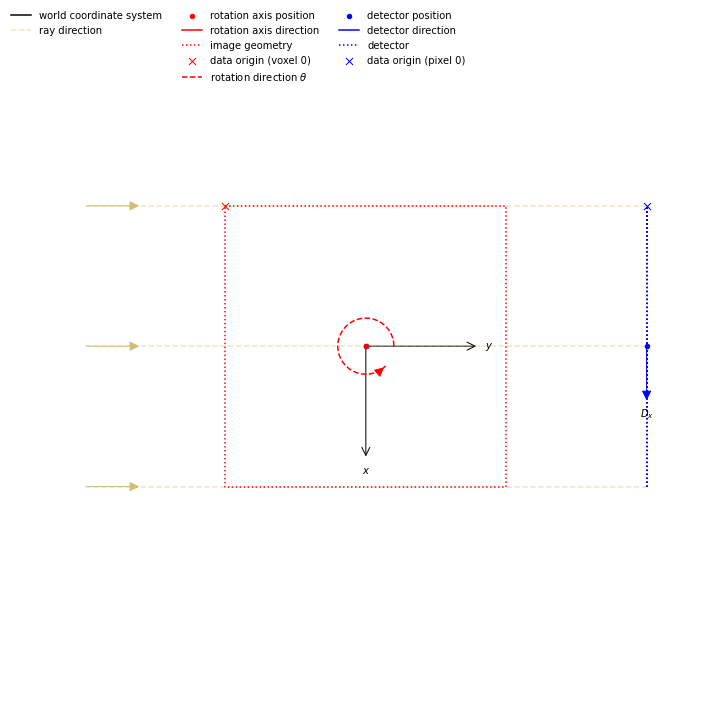

In [114]:
ag = AcquisitionGeometry.create_Parallel2D(detector_position=[0,10])\
    .set_panel(num_pixels=10)\
    .set_angles(angles=range(0,180))
show_geometry(ag)


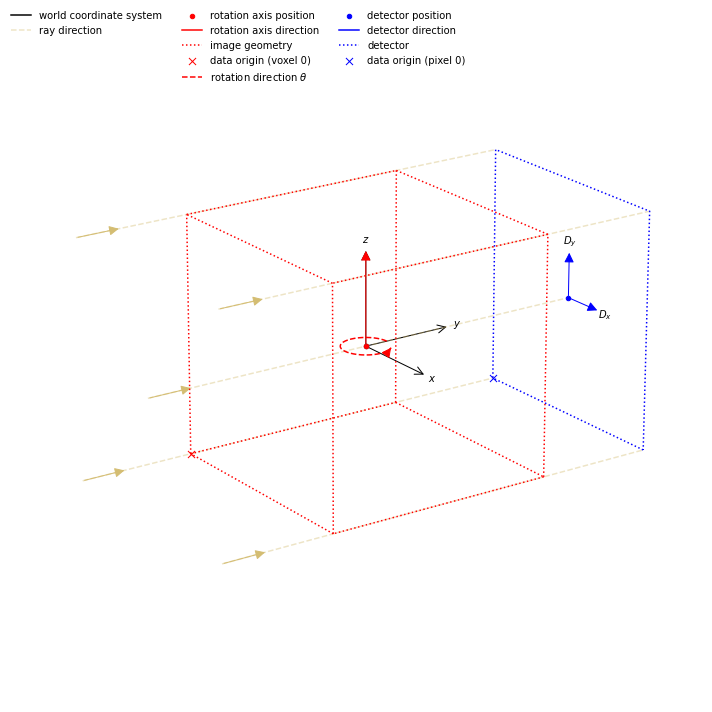

In [115]:
ag = AcquisitionGeometry.create_Parallel3D(detector_position=[0,10,0])\
    .set_panel(num_pixels=[10,10])\
    .set_angles(angles=range(0,180))
show_geometry(ag)

### Fan-beam geometry

A single point-like X-ray source emits a cone beam onto 1D detector pixel row. Cone-beam is typically collimated to imaging field of view. Collimation allows greatly reduce amount of scatter radiation reaching the detector. Fan-beam geometry is used when scattering has significant influence on image quality or single-slice reconstruction is sufficient.

We describe the system, and then set the panel and angle data.

For fan-beam data the source and detector positions are required. As default we place them along the Y-axis where the rotation-axis is on the origin. They are specified as `[x,y]` coordinates.

```python
cone_2D_geometry = AcquisitionGeometry.create_Cone2D(source_position=[0,-10],detector_position=[0,10])\
    
                                      .set_panel(num_pixels=10)\
        
                                      .set_angles(angles=range(0,180))
```

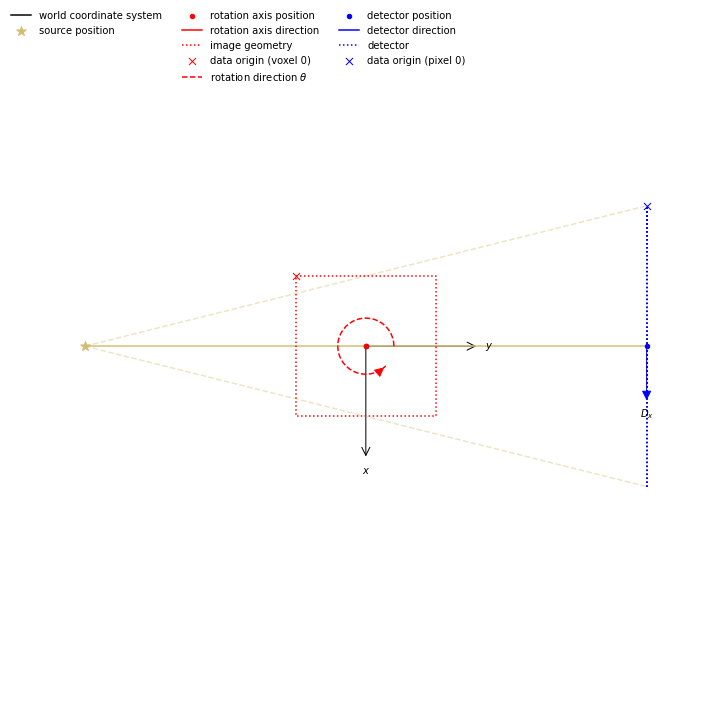

In [116]:
ag = AcquisitionGeometry.create_Cone2D(source_position=[0,-10],detector_position=[0,10])\
    .set_panel(num_pixels=10)\
    .set_angles(angles=range(0,180))
show_geometry(ag)

### Cone-beam geometry

A single point-like X-ray source emits a cone beam onto 2D detector array. Cone-beam geometry is mainly used in lab-based CT instruments.

We describe the system, and then set the panel and angle data.

For cone-beam data the source and detector positions are required. As default we place them along the Y-axis where the rotation-axis is on the origin and aligned in the Z-direction. They are specified as `[X,Y,Z]` coordinates.

```python
cone_3D_geometry = AcquisitionGeometry.create_Cone3D(source_position=[0,-10,0]),detector_position=[0,10,0])\
    
                                      .set_panel(num_pixels=[10,10])\
        
                                      .set_angles(angles=range(0,180))
```

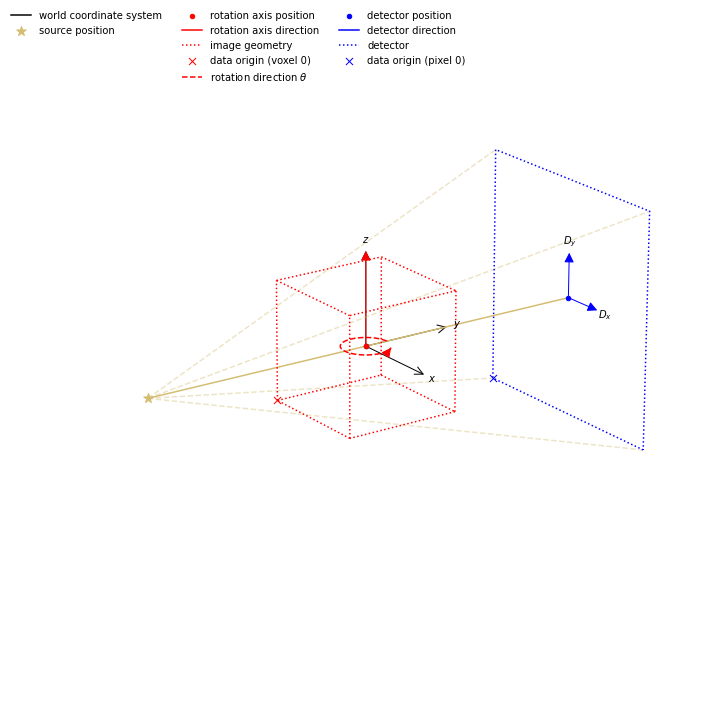

In [117]:
ag = AcquisitionGeometry.create_Cone3D(source_position=[0,-10,0],detector_position=[0,10,0])\
    .set_panel(num_pixels=[10,10])\
    .set_angles(angles=range(0,180))
show_geometry(ag)

## Create an offset Acquisition Geometry

It is unusual to have a perfectly aligned CT system. One of the most common offsets is the the rotation-axis. If this offset is described by the `AcquisitionGeometry` then it will be accounted for in the reconstruction. This saves having to pad your data to account for this.

To specify the offset you could either add an X component to the `source_position` and `detector_position` or you can offset the rotation axis from the origin using `rotation_axis_position`.

As with the `source_position` and `detector_position` this is the `rotation_axis_positon` is specified in 2D with a 2D vector `[X,Y]` or 3D with a 3D vector `[X,Y,Z]`




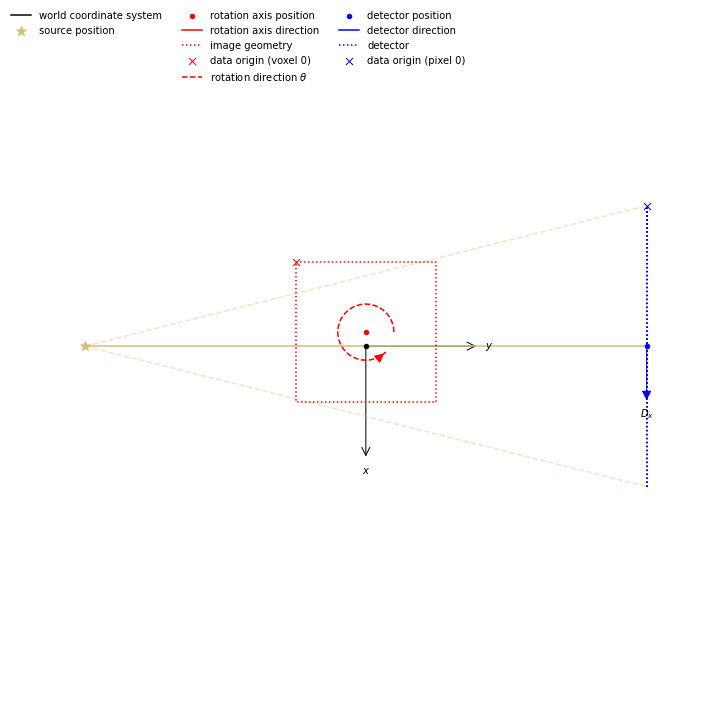

In [118]:
ag = AcquisitionGeometry.create_Cone2D(source_position=[0,-10],detector_position=[0,10],rotation_axis_position=[-0.5,0])\
    .set_panel(num_pixels=10)\
        .set_angles(angles=range(0,180))
show_geometry(ag)

## Create a rotated Acquisition Geometry

We can also set up rotations in the system. These are configured with vectors describing the direction.

For example a detector yaw can be described by using `detector_direction_x=[X,Y]`.


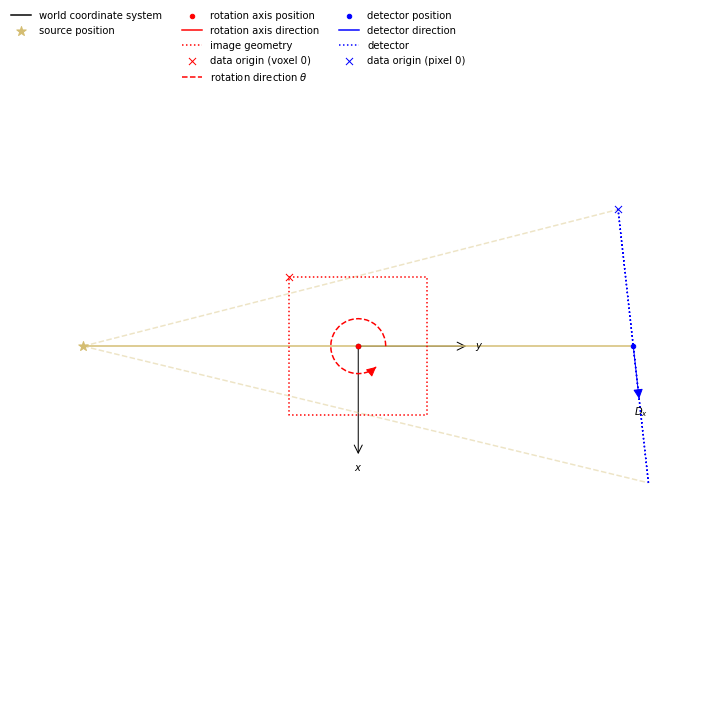

In [119]:
ag = AcquisitionGeometry.create_Cone2D(source_position=[0,-10],detector_position=[0,10],detector_direction_x=[0.9,0.1])\
    .set_panel(num_pixels=10)\
        .set_angles(angles=range(0,180))
show_geometry(ag)

For 3D datasets you can set `rotation_axis_direction`, `detector_direction_x` and `detector_direction_y` by specifying a 3D directional vector `[X,Y,Z]`.

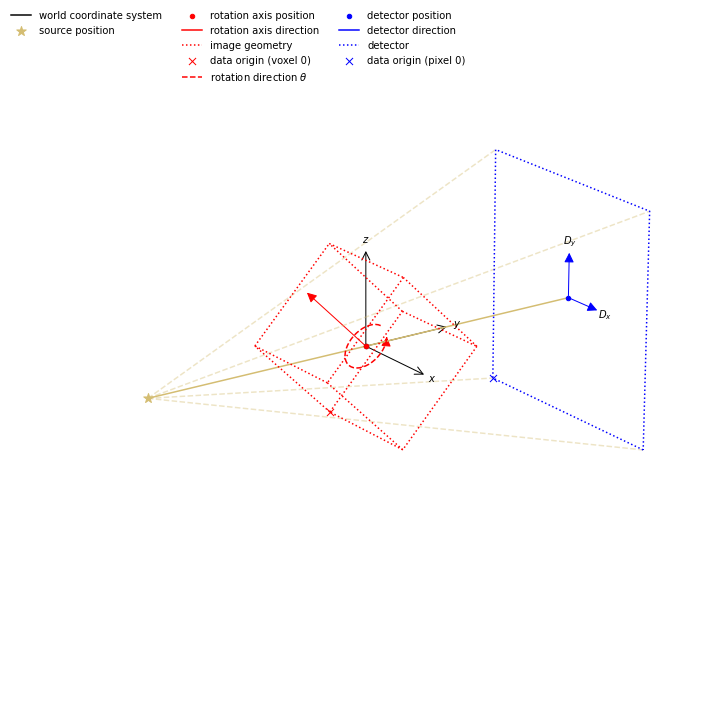

In [120]:
ag = AcquisitionGeometry.create_Cone3D(source_position=[0,-10,0],detector_position=[0,10,0],rotation_axis_direction=[0,-1,1])\
    .set_panel(num_pixels=(10,10))\
    .set_angles(angles=range(0,180))
show_geometry(ag)

In [ ]:
## ImageGeometry
A default ImageGoemetry can be created by calling 'ag.get_ImageGeometry()'

You can then change the members directly to reduce the reconstructed volume to exclude empty space. Using the previous example we now can specify a smaller region of interest to reconstruct.

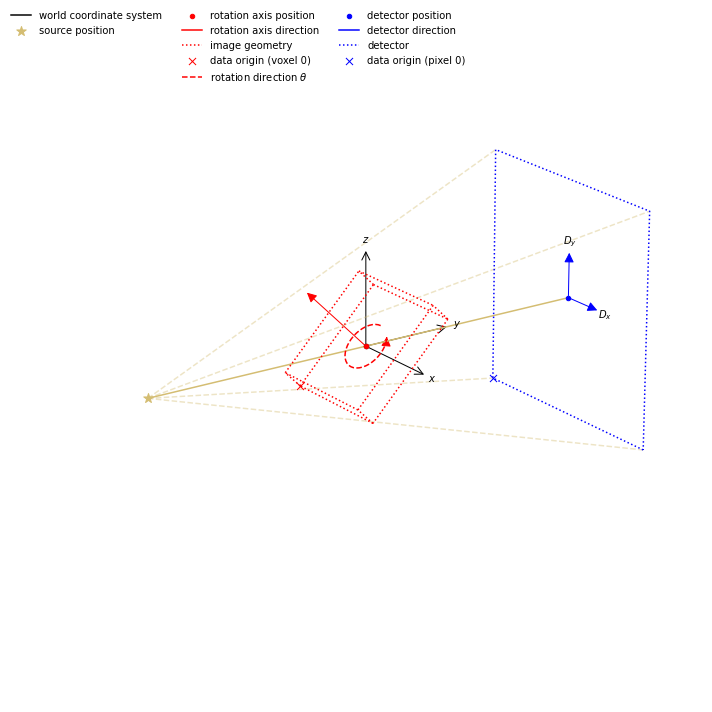

In [121]:
ag = AcquisitionGeometry.create_Cone3D(source_position=[0,-10,0],detector_position=[0,10,0],rotation_axis_direction=[0,-1,1])\
    .set_panel(num_pixels=(10,10))\
    .set_angles(angles=range(0,180))

ig = ag.get_ImageGeometry()
ig.voxel_num_z = 2

show_geometry(ag,ig)